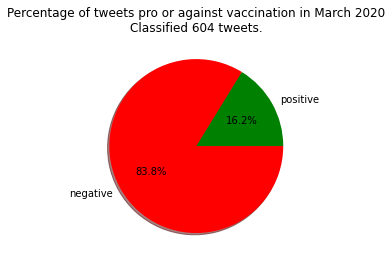

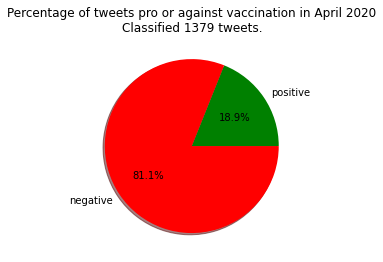

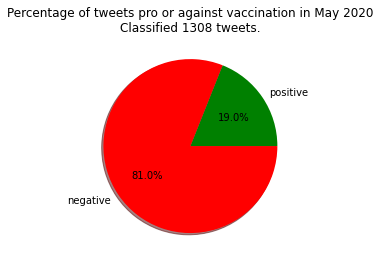

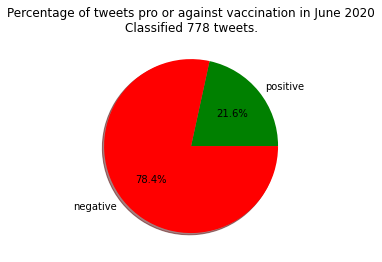

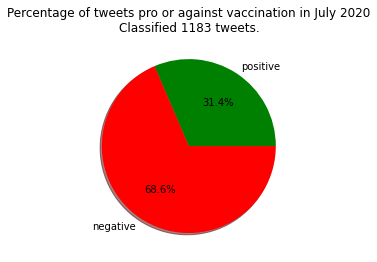

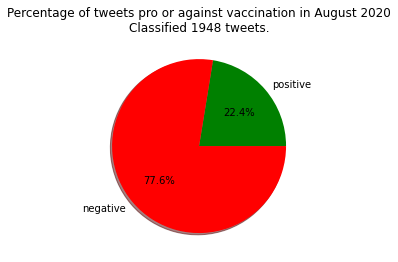

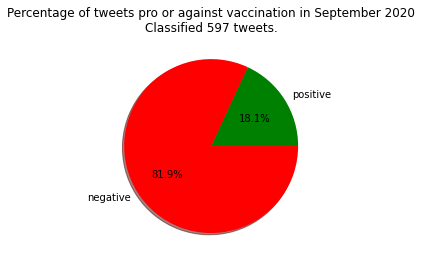

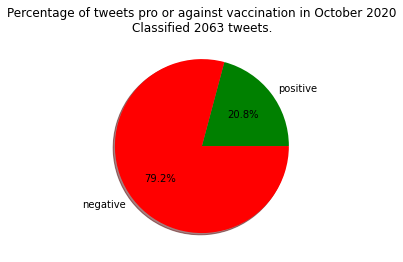

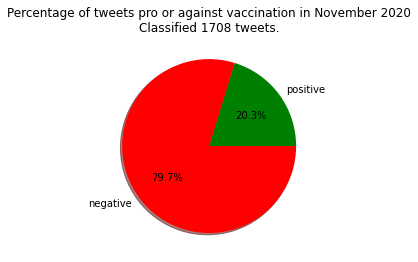

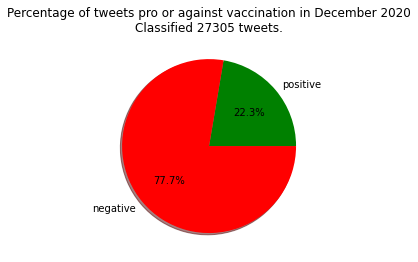

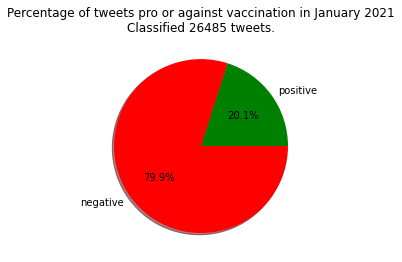

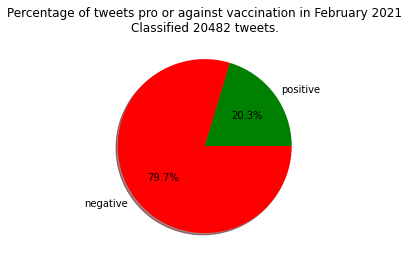

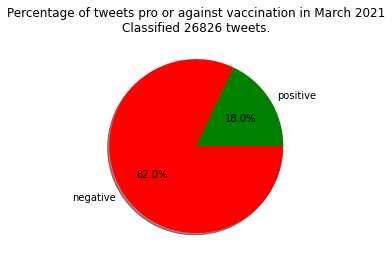

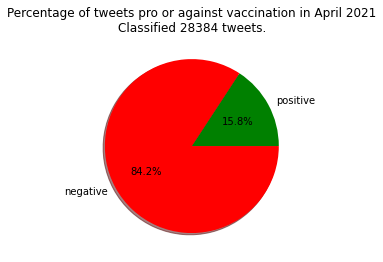

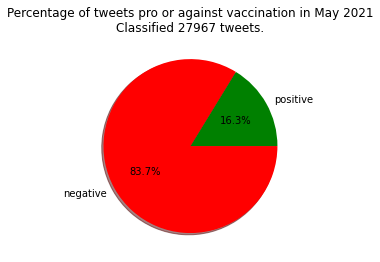

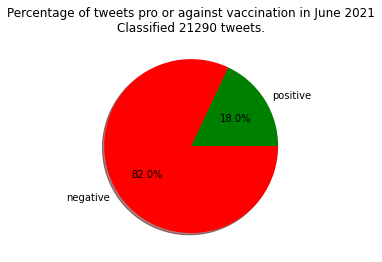

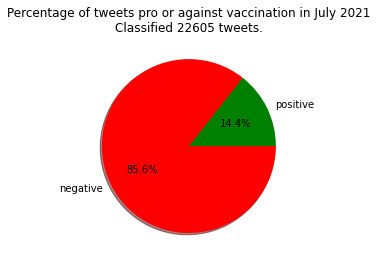

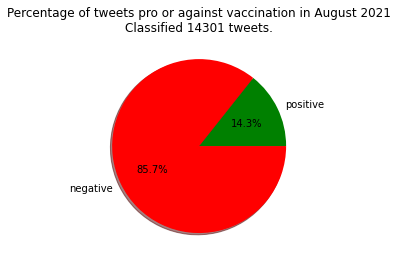

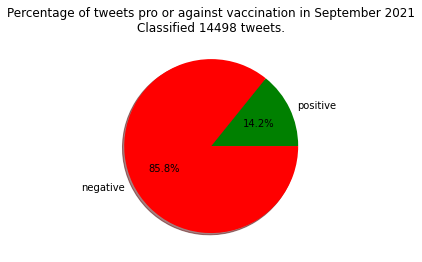

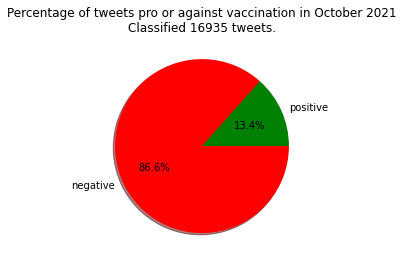

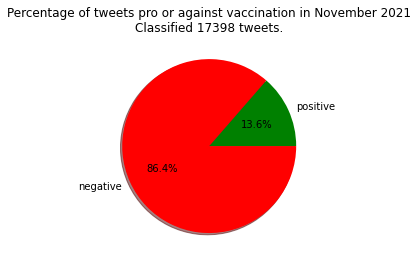

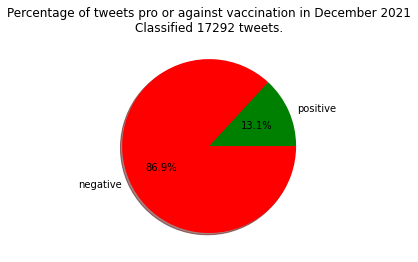

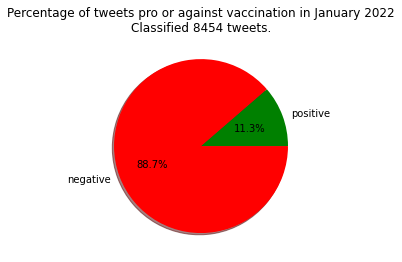

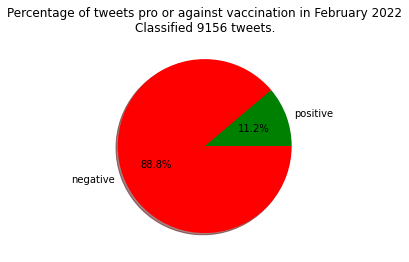

In [1]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl

from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter


algorithm = 'MultinomialNB'
algo_short = "mnb"
acc = '77'
dataset_dir = 'sentiment140'
# dataset_dir = 'imdb'
# dataset_dir = 'coronaNLP'

vaccines = ["biontech", "janssen", "moderna",
            "oxford", "sinopharm", "sinovac", "sputnik"]


# n_grams = [(1, 1), (1, 2)]
# n_grams = [(1, 1)]
n_grams = [(1, 2)]
years = ["2020", "2021", "2022"]
months = ["january", "february", "march", "april", "may", "june",
          "july", "august", "september", "october", "november", "december"]
war = []

for file in os.listdir("../data/"):
    war.append(file)

## MONTHS

for n_gram in n_grams:
    for year in years:
        for month in months:
            vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

            model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"

            # already processed
            try:
                df = pd.read_csv(f'../{year}-data/covid-{month}.csv', delimiter=',')
            except Exception:
                continue

            df = df.drop_duplicates()

            df = df[['tweet', 'sentiment']]

            tfidf = joblib.load(vectorizer_path)

            model = joblib.load(model_path)

            X = df.iloc[:, 0].fillna(' ')

            tweets = X

            num_of_tweets_analyzed = len(tweets)

            y_pred = tfidf.transform(X)

            predictions = model.predict(y_pred)

            # saving tweets to csv
            tweets.to_csv(f'../analysis/tweets-{month}-{year}-{n_gram}.csv')
            # saving sentiment predictions to csv
            np.savetxt(f'../analysis/predictions-{month}-{year}-{n_gram}.csv',
                    predictions, delimiter=',', fmt=('%s'))

            # adding sentiment column to the beginning
            df = pd.read_csv(
                f'../analysis/predictions-{month}-{year}-{n_gram}.csv', header=None)
            df.rename(columns={0: 'sentiment'}, inplace=True)
            # save to new csv file
            df.to_csv(
                f'../analysis/predictions-{month}-{year}-{n_gram}.csv', index=False)

            # merging tweets and predictions
            filenames = [f'../analysis/tweets-{month}-{year}-{n_gram}.csv',
                         f'../analysis/predictions-{month}-{year}-{n_gram}.csv']
            dfs = []
            for filename in filenames:
                # read the csv, making sure the first two columns are str
                df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
                # change the column names so they won't collide during concatenation
                df.columns = [filename + str(cname) for cname in df.columns]
                dfs.append(df)

            # concatenate them horizontally
            merged = pd.concat(dfs, axis=1)
            # write it out
            merged.to_csv(
                f"../analysis/merged-{month}-{year}-{n_gram}.csv", header=None, index=None)

            df = pd.read_csv(f'../analysis/merged-{month}-{year}-{n_gram}.csv')

            labels = ['negative', 'positive']

            title_type = df.groupby('sentiment').agg('count')

            type_labels = ['positive', 'negative']
            type_counts = title_type.tweet.sort_values()

            colors = ['g', 'r']

            plt.subplot(
                aspect=1, title=f'Percentage of tweets pro or against vaccination in {month.capitalize()} {year}\nClassified {num_of_tweets_analyzed} tweets.')
            type_show_ids = plt.pie(type_counts, labels=type_labels,
                                    autopct='%1.1f%%', shadow=True, colors=colors)
            plt.savefig(f"../visuals/{algo_short}/{month}-{year}-{n_gram}.png")
            plt.show()



war-czech.csv


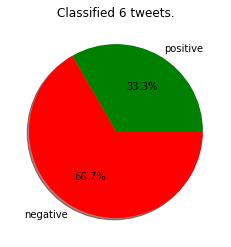

war-french.csv


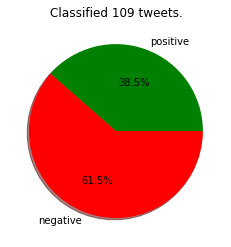

war-german.csv


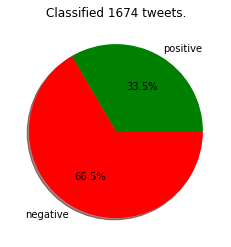

war-italian.csv


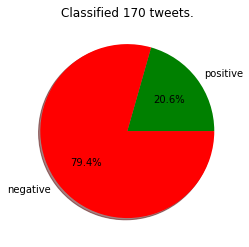

war-norwegian.csv


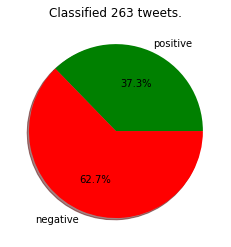

war-polish.csv


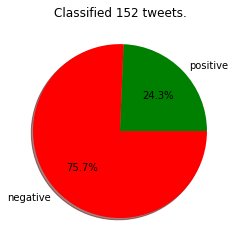

war-russian.csv


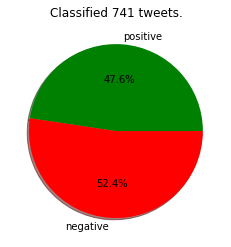

war-spanish.csv


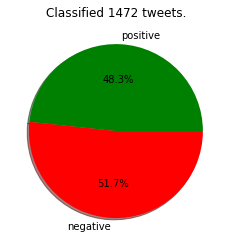

war-swedish.csv


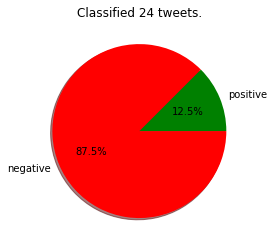

war.csv


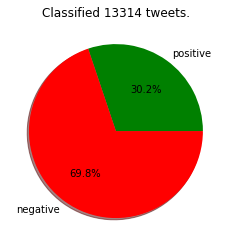

war2.csv


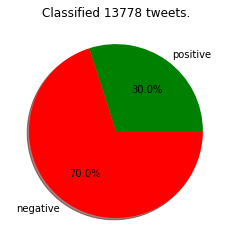

In [2]:


## WAR!
for n_gram in n_grams:
    vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"
    model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"
    tfidf = joblib.load(vectorizer_path)
    model = joblib.load(model_path)
    for lang in war:
            print(lang)
            # already processed
            df = pd.read_csv(f'../data/{lang}', delimiter=',')

            df = df.drop_duplicates()

            df = df[['tweet', "translate", 'sentiment']]
            
            if not lang == 'war.csv' and not lang == 'war2.csv':
                df['tweet'] = df['translate']


            X = df.iloc[:, 0].fillna(' ')

            tweets = X

            num_of_tweets_analyzed = len(tweets)

            y_pred = tfidf.transform(X)

            predictions = model.predict(y_pred)
            
            # saving tweets to csv
            tweets.to_csv(f'../analysis/tweets-{lang}.csv')
            # saving sentiment predictions to csv
            np.savetxt(f'../analysis/predictions-{lang}.csv',
                    predictions, delimiter=',', fmt=('%s'))

            # adding sentiment column to the beginning
            df = pd.read_csv(
                f'../analysis/predictions-{lang}.csv', header=None)
            df.rename(columns={0: 'sentiment'}, inplace=True)
            # save to new csv file
            df.to_csv(
                f'../analysis/predictions-{lang}.csv', index=False)

            # merging tweets and predictions
            filenames = [f'../analysis/tweets-{lang}.csv',
                        f'../analysis/predictions-{lang}.csv']
            dfs = []
            for filename in filenames:
                # read the csv, making sure the first two columns are str
                df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
                # change the column names so they won't collide during concatenation
                df.columns = [filename + str(cname) for cname in df.columns]
                dfs.append(df)

            # concatenate them horizontally
            merged = pd.concat(dfs, axis=1)
            # write it out
            merged.to_csv(
                f"../analysis/merged-{lang}.csv", header=None, index=None)

            df = pd.read_csv(f'../analysis/merged-{lang}.csv')


            title_type = df.groupby('sentiment').agg('count')

            type_labels = ['positive', 'negative']
            type_counts = title_type.tweet.sort_values()

            colors = ['g', 'r']

            plt.subplot(
                aspect=1, title=f'Classified {num_of_tweets_analyzed} tweets.')
            type_show_ids = plt.pie(type_counts, labels=type_labels,
                                    autopct='%1.1f%%', shadow=True, colors=colors)
            plt.savefig(f"../visuals/{algo_short}/{lang}.png")
            plt.show()
            


                                               tweet  sentiment
0  tabl 4 number suspect adr report receiv uk inc...          2
1  stop meaningless 1 dose isnt vaccin biontech m...          2
2  biontech curevac part 31 billion deal bolster ...          2
3  would anyth 2019 biontech sec file help prove ...          2
4  mar 17 vaccin 3 dose administ date total 14355...          2


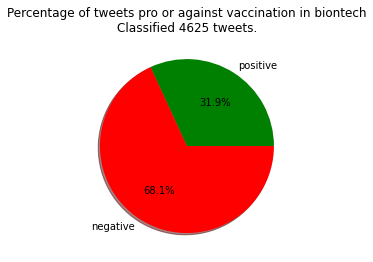

                                               tweet  sentiment
0  march 17 2021 new york citi — governor andrew ...          2
1  6 say trump got vaccin made wasnt pfizer wasnt...          2
2  rememb conspiraci theori us cdc knew vaccin un...          2
3                 na wild got johnson johnson vaccin          2
4  doctor urg bori johnson better global covid19 ...          2


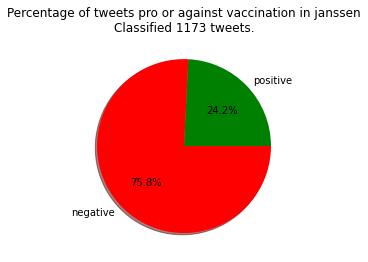

                                               tweet  sentiment
0                  meh aw conveni base caught doing…          2
1                     moderna help rna drug come age          2
2                                            serious          2
3  hawk never alp member amp dont plan join focus...          2
4                     lexonyt yea hardi one lmfaoooo          2


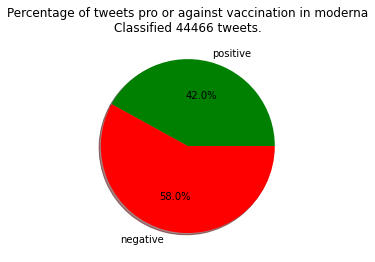

                                               tweet  sentiment
0  first part seem specul comment militari isnt e...          2
1  azn new articl astrazeneca covid vaccin altern...          2
2  yorkshir mum die agoni brain bleed covid astra...          2
3  bigfollow vaccin effect hospitalis omicron var...          2
4  oxfordastrazeneca chadox1 recombin vaccin covi...          2


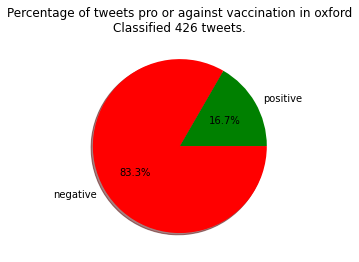

                                               tweet  sentiment
0  interim recommend use inactiv covid19 vaccin b...          2
1  major citizen hk vaccin sinovac biotech corona...          2
2  happi share preprint new manuscript entitl cov...          2
3  vaccin ad regist institut india covishieldbeij...          2
4  emin bangladesh explain covid19 status banglad...          2


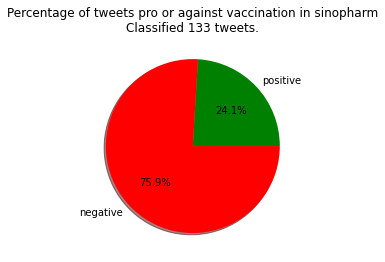

                                               tweet  sentiment
0  young children receiv two dose china sinovac b...          2
1  mar 15 2022 realworld studi report access effe...          2
2  chinabas sinovac biotech ltds covid19 vaccin 3...          2
3  need know coronavirus right il 6heur chinabas ...          2
4  chinabas sinovac biotech ltds covid19 vaccin 3...          2


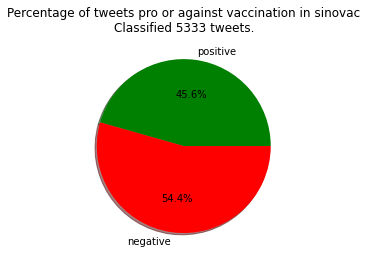

                                               tweet  sentiment
0  whitneywebb relat materi russia sputnik v wef ...          2
1  postpon plan inspect sputnik v russia health n...          2
2  postpon plan inspect sputnik v russia health n...          2
3  studi publish cell show 1dose vaccin base ad26...          2
4  geneva world health organ delay assess process...          2


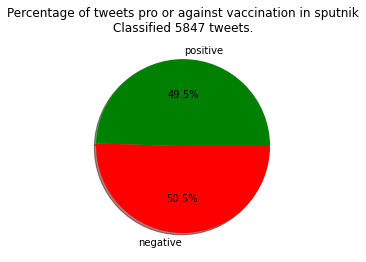

In [8]:

for n_gram in n_grams:
    for vaccine in vaccines:
        vectorizer_path = f"../vectors/vectorizer_{dataset_dir}_{n_gram}.pkl"

        model_path = f"../models/{algorithm}_{dataset_dir}_{acc}_{n_gram}.pkl"

        # already processed
        try:
            df = pd.read_csv(f'../vaccines/{vaccine}.csv', delimiter=',')
        except Exception as e:
            print(e)
            continue
        print(df.head())
        df = df.drop_duplicates()

        df = df[['tweet', 'sentiment']]

        tfidf = joblib.load(vectorizer_path)

        model = joblib.load(model_path)

        X = df.iloc[:, 0].fillna(' ')

        tweets = X

        num_of_tweets_analyzed = len(tweets)

        y_pred = tfidf.transform(X)

        predictions = model.predict(y_pred)

        # saving tweets to csv
        tweets.to_csv(f'../analysis/tweets-{vaccine}-{n_gram}.csv')
        # saving sentiment predictions to csv
        np.savetxt(f'../analysis/predictions-{vaccine}-{n_gram}.csv',
                predictions, delimiter=',', fmt=('%s'))

        # adding sentiment column to the beginning
        df = pd.read_csv(
            f'../analysis/predictions-{vaccine}-{n_gram}.csv', header=None)
        df.rename(columns={0: 'sentiment'}, inplace=True)
        # save to new csv file
        df.to_csv(
            f'../analysis/predictions-{vaccine}-{n_gram}.csv', index=False)

        # merging tweets and predictions
        filenames = [f'../analysis/tweets-{vaccine}-{n_gram}.csv',
                        f'../analysis/predictions-{vaccine}-{n_gram}.csv']
        dfs = []
        for filename in filenames:
            # read the csv, making sure the first two columns are str
            df = pd.read_csv(filename, header=None, converters={0: str, 1: str})
            # change the column names so they won't collide during concatenation
            df.columns = [filename + str(cname) for cname in df.columns]
            dfs.append(df)

        # concatenate them horizontally
        merged = pd.concat(dfs, axis=1)
        # write it out
        merged.to_csv(
            f"../analysis/merged-{vaccine}-{n_gram}.csv", header=None, index=None)

        df = pd.read_csv(f'../analysis/merged-{vaccine}-{n_gram}.csv')

        labels = ['negative', 'positive']

        title_type = df.groupby('sentiment').agg('count')

        type_labels = ['positive', 'negative']
        type_counts = title_type.tweet.sort_values()

        colors = ['g', 'r']

        plt.subplot(
            aspect=1, title=f'Percentage of tweets pro or against vaccination in {vaccine}\nClassified {num_of_tweets_analyzed} tweets.')
        type_show_ids = plt.pie(type_counts, labels=type_labels,
                                autopct='%1.1f%%', shadow=True, colors=colors)
        plt.savefig(f"../visuals/{algo_short}/{vaccine}-{n_gram}.png")
        plt.show()

